In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)
from IPython import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

path= '/content/drive/MyDrive/deep_learning_tutorials/diabetes.csv'
data= pd.read_csv(path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def scale(x):
  """
  Parameters
  -------
    x: dataframe

  Returns
  -------
    x_scaled: dataframe
  
  """
  x_scaled= (x-np.mean(x))/np.std(x)
  return x_scaled

In [ ]:
data.iloc[:,:-1] = scale(data)
data.head()

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [ ]:
data.shape

(768, 9)

In [ ]:
def split_data(df, train_percent= 0.8):
  """
  Parameters
  -------
    df: a dataframe
    train_percent: a float
    

  Returns
  -------
    
    x_train: an array
    x_test: an array 
    y_train: an array
    y_test: an array
  
  """
  np.random.seed(2)
  indice = np.random.permutation(data)
  n = int(len(indice)*train_percent)

  ...
  x_train, y_train = data.iloc[:n,:-1], data.iloc[:n,-1]#.values.reshape(-1,1)
  x_test , y_test = data.iloc[n:, :-1], data.iloc[n:, -1]#.values.reshape(-1,1)
  return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [ ]:
def sigmoid(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: 1/(1+exp(-x))

      a list of value between 0 and 1
  """
  y = 1/(1+np.exp(-x))
  return y

In [ ]:
def dsigmoid(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: sigmoid(x)*(1- sigmoid(x))

      a list of value of the derivative of sigmoid
  """
  y = sigmoid(x)*(1- sigmoid(x))
  return y

In [ ]:
def cross_entropy(y,y_pred):
  """
  Parameters
  ----------
    y: an array
    y_pred: array

  return
  ------
   : float
  """
  
  loss= -np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
  
  return loss

In [ ]:
def forward_pass(x, w1, b1, w2, b2):
  """
  Parameters
  ---------
    x: an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  Return
  ------
    z1: an array of shape (N, hidden_dim)
    a1: an array of shape (N, hidden_dim)
    z2: an array of shape (N, output_dim)
    a2: an array of shape (N, output_dim)
  """
  z1= w1@x.T+b1
  a1= sigmoid(z1)

  z2= w2@a1+b2
  a2= sigmoid(z2)


  return z1, a1, z2, a2

In [ ]:
def backwardpass(x,y, w1, b1, w2, b2):
  """
  Parameters
  ---------
    x:  an array of N rows
    y:  an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  Return
  ------
    dw1: an array of shape (hidden_dim, input_dim)
    db1: an array of shape (hidden_dim, 1). Bias vector
    dw2: an array of shape (output_dim, hidden_dim)
    db2: an array of shape (1, 1)
  """
  
  # Forward pass
  z1, a1, z2, a2=forward_pass(x, w1, b1, w2, b2)
  m= x.shape[0]
  #Backward


  db2=(1/m)*np.sum(a2-y, axis = 1).values.reshape(-1,1)
  dw2=((1/m)*(a2-y)@a1.T)

  db1=(1/m)*np.sum((w2.T@(a2-y))*dsigmoid(z1), axis = 1).values.reshape(-1,1)

  dw1=(1/m)*(w2.T@(a2-y)*(dsigmoid(z1)))@x

  return dw1, db1, dw2, db2

In [ ]:
#y_train.shape[1]

In [ ]:
def train(x,y, x_val, y_val):
  """
  Parameters
  ---------
    x:  an array of N rows
    y:  an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  Return
  ------
    cost: an array of shape (num_epochs, )
    cost_test: an array of shape (num_epochs, ).
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  """
  input_dim=  x.shape[1] # number of features
  hidden_dim= 20 # number of units in the hideen layer
  output_dim= 1 # number of units in the output layer
  w1 = np.random.rand(hidden_dim, input_dim)*0.01 # (hidden_dim, input_dim)
  b1 = np.random.rand(hidden_dim, 1) # (hidden_dim, 1)

  w2 = np.random.rand( output_dim, hidden_dim)*0.01 # (output_dim, hidden_dim)
  b2 = np.random.rand(output_dim, 1) # (output_dim, 1)
  lr = 0.001
  num_epochs = 1000

  cost =[]
  cost_test= []

  for i in range(num_epochs):
      # Backward Pass
      dw1, db1, dw2, db2 =backwardpass(x,y, w1, b1, w2, b2)

      # Update weights
      w1 =w1- lr*dw1
      b1 =b1- lr*db1
      

      w2 = w2-lr*dw2
      b2= b2-lr*db2

      # Get the Train Loss
      # apply forward to get z1, a1, z2 and a2
      z1, a1, z2, a2=forward_pass(x, w1, b1, w2, b2)

      #Compute the loss
      loss_tain = cross_entropy(y,a2.squeeze(0))
      cost.append(loss_tain)


      # Get the Test Loss
      # apply forward to get z1, a1, z2 and a2 using x_val

      z1, a1, z2, a2=forward_pass(x_val, w1, b1, w2, b2)
      loss_test = cross_entropy(y_val,a2.squeeze(0))
      cost_test.append(loss_test)
  
  return cost, cost_test, w1, b1, w2, b2

In [ ]:
def accuracy(y, y_pred):
  acc= np.mean(y==y_pred)*100
  return acc

In [ ]:
threshold= 0.5
def get_class(x):
  _,_,_,proba= forward_pass(x, w1, b1, w2, b2) # Get probability of x
  proba= proba.squeeze(0)
  result= [1 if i> threshold else 0 for i in proba] # Convert proba to 0 or 1. hint: list comprehension
  return np.array(result), proba

In [ ]:
cost, cost_test, w1, b1, w2, b2= train(x_train,y_train, x_test, y_test)

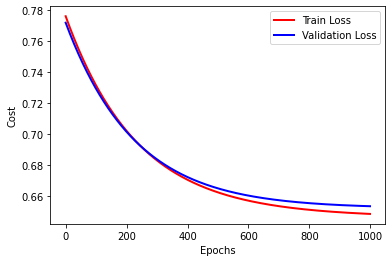

In [ ]:
def plot(cost, cost_test):
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.plot(np.arange(len(cost)), cost, 'r', linewidth = "2", label= 'Train Loss')
  plt.plot(np.arange(len(cost_test)), cost_test, 'b', linewidth = "2", label= 'Validation Loss')
  plt.legend()
  plt.show()
  
plot(cost, cost_test)

In [ ]:
y_pred, y_proba= get_class(x_test)

In [ ]:
accuracy(y_test, y_pred)

64.28571428571429

# NN Class

In [ ]:
# BGD
class NN:
  def __init__(self, x_test, y_test, size, num_epochs= 1000, lr= 0.001, threshold= 0.5):
    self.num_epochs= num_epochs
    self.lr= lr
    self.threshold= threshold
    self.cost_train= []
    self.size= size
    self.x_test=x_test 
    self.y_test= y_test
    self.params= self.weight_initialization()

  def sigmoid(self,x):
    return sigmoid(x)
  
  def dsigmoid(self,x):
    return dsigmoid(x)


  def cross_entropy(self,y,y_pred):
    loss= cross_entropy(y,y_pred)
    return loss
  
  def weight_initialization(self):
    input_dim= self.size[0]
    hidden_dim= self.size[1]
    output_dim= self.size[2]


    params = {
            'w1':np.random.rand(hidden_dim,input_dim)*0.01,
            'b1':np.random.rand(hidden_dim,1),
            'w2':np.random.rand(output_dim, hidden_dim)*0.01,
            'b2':np.random.rand(1,1) 
        }

    return params

  def forward_pass(self, x):
    params= self.params
    z1= params['w1']@x.T+params['b1']
    a1= self.sigmoid(z1)

    z2= params['w2']@a1+params['b2']
    a2= self.sigmoid(z2)
    

    # ForwardPass
    
    return z1, a1, z2, a2
  
  def backward_pass(self, x, y):
    params= self.params

    

    # Backward
    z1, a1, z2, a2=self.forward_pass(x)
    m= x.shape[0]
  #Backward


    db2=(1/m)*np.sum(a2-y, axis = 1).values.reshape(-1,1)
    dw2=((1/m)*(a2-y)@a1.T)

    db1=(1/m)*np.sum((params['w2'].T@(a2-y))*self.dsigmoid(z1), axis = 1).values.reshape(-1,1)

    dw1=(1/m)*(params['w2'].T@(a2-y)*(self.dsigmoid(z1)))@x
    

    return dw1, db1, dw2, db2

  def fit(self, x, y):

    for i in range(self.num_epochs):

      # Get Params

      params= self.params
      dw1, db1, dw2, db2 = self.backward_pass(x, y)

      params['w1']= params['w1']-self.lr*dw1
      params['b1']= params['b1']-self.lr*db1

      params['w2']= params['w2'] - self.lr*dw2
      params['b2']= params['b2'] - self.lr*db2
      z1, a1, z2, a2=self.forward_pass(x)
      loss_tain = self.cross_entropy(y,a2.squeeze(0))
      self.cost_train.append(loss_tain)
    return params['w1'], params['b1'], params['w2'], params['b2'] 

      

  
    
  
  def get_class(self, x):
    w1, b1, w2, b2= self.params['w1'], self.params['b1'], self.params['w2'], self.params['b2']
    _,_,_,proba= self.forward_pass(x) 
    proba= proba.squeeze(0)
    result= [1 if i> threshold else 0 for i in proba] # Convert proba to 0 or 1. hint: list comprehension
    return np.array(result), proba

  def accuracy(self, y,y_pred):
    return np.mean(y==y_pred)*100
  def plot(self):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_train)), self.cost_train, 'r', linewidth = "2", label= 'Train Loss')
    plt.legend()
    plt.show()

In [ ]:
size= [x_train.shape[1], 16, 1]
model= NN(x_test, y_test, size, num_epochs= 2000, lr= 0.001)

In [ ]:
model.fit(x_train, y_train)

(    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 0     -0.000054 -0.002580       0.001596       0.007819  0.001380 -0.004947   
 1     -0.001891 -0.002998       0.004382       0.003232  0.003262 -0.003252   
 2      0.004687 -0.004387       0.007285       0.003215  0.003378  0.000203   
 3      0.005194 -0.004794       0.007279       0.003963  0.003184  0.002581   
 4     -0.003942 -0.004519       0.004786       0.000546  0.003263  0.003709   
 5      0.002987 -0.005983       0.001212       0.000431 -0.001082 -0.000253   
 6     -0.000256 -0.008652       0.002141       0.004587 -0.001288  0.000160   
 7     -0.003237 -0.005088       0.003297      -0.001085 -0.000886 -0.002653   
 8      0.001629 -0.005232       0.006529       0.008110  0.005163  0.001703   
 9      0.006253 -0.005908       0.008728       0.006895 -0.000179  0.003227   
 10     0.004503 -0.005710       0.004969       0.005434  0.005066  0.000101   
 11     0.000102 -0.005495       0.00571

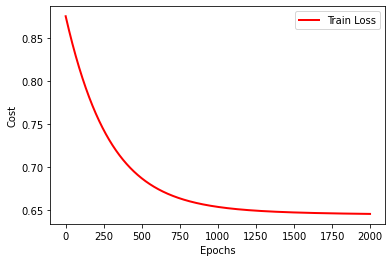

In [ ]:
model.plot()

In [ ]:
y_pred= model.get_class(x_test)

In [ ]:
y_test

614    1
615    0
616    0
617    0
618    1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 154, dtype: int64

In [ ]:
model.accuracy(y_pred,y_test.values.reshape(-1,))

32.142857142857146